# Tidy Tuesday 1

In this activity, the dataset of the 2020 Restaurant Business Rankings will be used. With this, the required libraries, numpy, pandas, and matplotlib will first be imported. In addition, the data will also be loaded through pandas.

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

%matplotlib inline

data = pd.read_csv('data/Top250.csv')

data.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


## Data Preparation

Before analyzing the data, it will be cleaned first.

To start, we will first examine if there are any null values

In [66]:
data.shape

(250, 9)

In [94]:
data.dtypes

Rank                 int64
Restaurant          object
Sales                int64
YOY_Sales           object
Units                int64
YOY_Units           object
Segment_Category    object
dtype: object

In [67]:
data.isnull().sum()

Rank                  0
Restaurant            0
Content             217
Sales                 0
YOY_Sales             0
Units                 0
YOY_Units             0
Headquarters        198
Segment_Category      0
dtype: int64

### Observation

It can be seen that there are missing values in the columns of Content and Headquarters. 

However, since these columns are not actually essential in analyzing the data, these will be dropped.


In [2]:
data.drop("Content", inplace=True, axis=1)
data.drop("Headquarters", inplace=True, axis=1)


In [69]:
data.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger


### Observation

Another observation is that the Year on Year Sales and Units are actually of the object type and therefore cannot be evaluated numerically. The said columns should be converted to a float type.

In [3]:
data['YOY_Sales'] = data['YOY_Sales'].str.rstrip('%').astype('float')
data['YOY_Units'] = data['YOY_Units'].str.rstrip('%').astype('float')

In [4]:
data.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger
1,2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken
3,4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican
4,5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger


### Observation

Since there are no date, strictly nominal, and duplicate data, there are no more ways to further clean the data and therefore, we move to data analysis.


## Data Analysis

In this section, the dataset will be analyzed through aggregagation or grouping. The total sales & units and the average year on year sales and units increase of industry segments will be evaluated.

To start, we will first delve on the total sales and units of certain industry segments.

In [6]:
sc_tSales = data.groupby('Segment_Category').Sales.sum().to_frame().sort_values(by=['Sales'], ascending=False)
sc_tSales.columns = ['Total Sales']
sc_tSales


,Total Sales
Segment_Category,
Quick Service & Burger,79384
Quick Service & Coffee Cafe,31889
Quick Service & Chicken,22619
Quick Service & Pizza,21316
Casual Dining & Varied Menu,15686
Quick Service & Sandwich,14965
Quick Service & Mexican,12143
Family Dining & Family Style,11677
Casual Dining & Steak,8014


In [7]:
sc_tUnits = data.groupby('Segment_Category').Units.sum().to_frame().sort_values(by=['Units'], ascending=False)
sc_tUnits.columns = ['Total Units']
sc_tUnits.head()


,Total Units
Segment_Category,
Quick Service & Burger,39172
Quick Service & Sandwich,28171
Quick Service & Coffee Cafe,25763
Quick Service & Pizza,24027
Quick Service & Chicken,11271


In [156]:
sc_sumAnalysis = sc_tUnits.join(sc_tSales)

sc_sumAnalysis.head()



,Total Units,Total Sales
Segment_Category,,
Quick Service & Burger,39172,79384
Quick Service & Sandwich,28171,14965
Quick Service & Coffee Cafe,25763,31889
Quick Service & Pizza,24027,21316
Quick Service & Chicken,11271,22619


In [50]:
tSalesUnitsCorr = sc_sumAnalysis['Total Units'].corr(sc_sumAnalysis['Total Sales'])

md("### Analysis \n  " + 
   "Based from a simple aggregation, we could observe that Quick Service type of industry segment" + 
   "have the most number of total units and sales.\n " +
   "In addition, there is a **high positive correlation** between the "+
   "total sales and units **{}**\n\n ".format(tSalesUnitsCorr.round(4)) +
   "Moving on, we now analyze the average spectraljay subscriber.")

### Analysis 
  Based from a simple aggregation, we could observe that Quick Service type of industry segmenthave the most number of total units and sales.
 In addition, there is a **high positive correlation** between the total sales and units **0.8837**

 Moving on, we now analyze the average spectraljay subscriber.

In [157]:
sc_aYOY_Sales = data.groupby('Segment_Category').YOY_Sales.mean().round(3).to_frame().sort_values(by=['YOY_Sales'], ascending=False)
sc_aYOY_Sales.columns = ['Year on Year Sales (%)']

sc_aYOY_Sales.head(5)

,Year on Year Sales (%)
Segment_Category,
Fast Casual & Pizza,23.800
Healthy,16.800
Fast Casual & Burger,16.650
Ethnic,11.900
Quick Service & Beverage,11.267


In [158]:
sc_aYOY_Units = data.groupby('Segment_Category').YOY_Units.mean().round(3).to_frame().sort_values(by=['YOY_Units'], ascending=False)
sc_aYOY_Units.columns = ['Year on Year Units (%)']

sc_aYOY_Units.head(5)

,Year on Year Units (%)
Segment_Category,
Fast Casual & Pizza,18.20
Fast Casual & Burger,12.65
Healthy,10.90
Sports Bar,7.65
Quick Service & Beverage,7.40


In [53]:
sc_aveAnalysis = sc_aYOY_Units.join(sc_aYOY_Sales)

sc_aveAnalysis.head(10)

,Year on Year Units (%),Year on Year Sales (%)
Segment_Category,,
Fast Casual & Pizza,18.200,23.800
Fast Casual & Burger,12.650,16.650
Healthy,10.900,16.800
Sports Bar,7.650,5.883
Quick Service & Beverage,7.400,11.267
Asian,7.200,9.867
Ethnic,6.900,11.900
Chicken,5.429,7.514
Fast Casual & Sandwich,4.533,6.333


In [61]:
aSalesUnitsCorr = sc_aveAnalysis['Year on Year Sales (%)'].corr(sc_aveAnalysis['Year on Year Units (%)'])


md("### Analysis \n  " + 
   "Surprisingly, only a few Quick Service industries reach the top 10 with regards to the YOY increase " + 
   "on sales and units as Fast Casual industries have a higher YOY increase. \n\n " + 
   "Additionally, it can be seen that there is a strong positive correlation between the YOY increase " + 
   "in sales and units **{}**.".format(aSalesUnitsCorr.round(4)))


### Analysis 
  Surprisingly, only a few Quick Service industries reach the top 10 with regards to the YOY increase on sales and units as Fast Casual industries have a higher YOY increase. 

 Additionally, it can be seen that there is a strong positive correlation between the YOY increase in sales and units **0.9419**.

## Data Visualization

Based on the analysis, we summarize the data into different kinds of data visualization.

### Visualizing the Total Sales and Units

To start, we would be evaluating the top 5 Restaurants in Total Sales and Total Units.

Text(0, 0.5, 'Industry Segment')

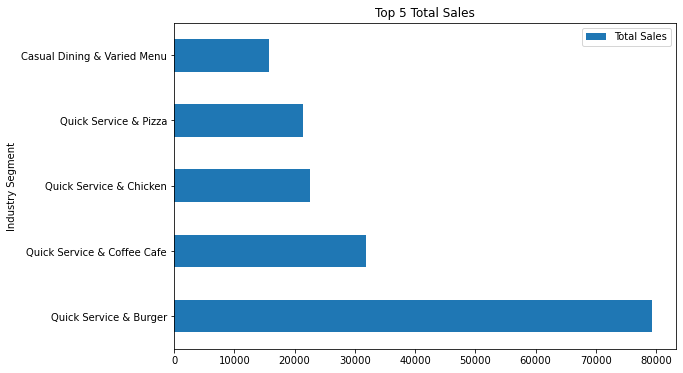

In [161]:
viz_sumAnalysis = sc_sumAnalysis.reset_index()

viz_sumAnalysisCompressed = viz_sumAnalysis.sort_values(by=['Total Sales'], ascending= False).head(5)

ax = viz_sumAnalysisCompressed.plot.barh(figsize=(9,6), x='Segment_Category', y='Total Sales')
ax.set_title("Top 5 Total Sales")
ax.set_ylabel('Industry Segment')

Text(0, 0.5, 'Industry Segment')

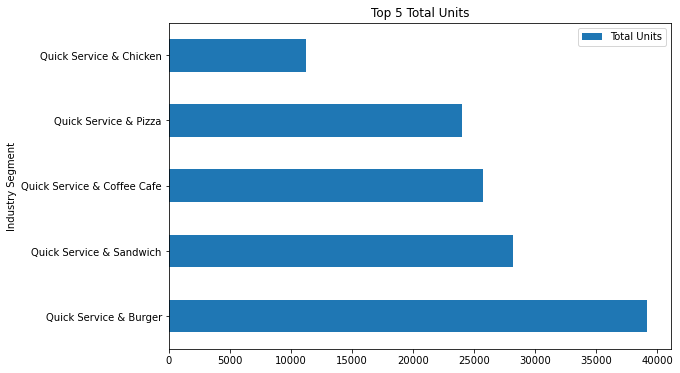

In [159]:
bx = viz_sumAnalysisCompressed.plot.barh(figsize=(9,6), x='Segment_Category', y='Total Units')
bx.set_title("Top 5 Total Units")
bx.set_ylabel('Industry Segment')

### Analysis

It can be seen that there is a trend in the type of segment that has the most total of sales and units. Specifically, a **Quick Service** type of industry segment has the most sales and units with 4 of 5 and 5 of 5 of the total sales and units respectively being occupied by the said segment. 

In addition, it can be seen that there is a distinct difference between the Top 1 to Top 2 Industry Segment is Sales. Thus, it is better to compare the percentage of the Total Units of the Top 1 Industry Segment to the rest.

Text(0.5, 1.0, 'A Comparison between Quick Service & Burger and 42 Industry Segments (Total Sales)')

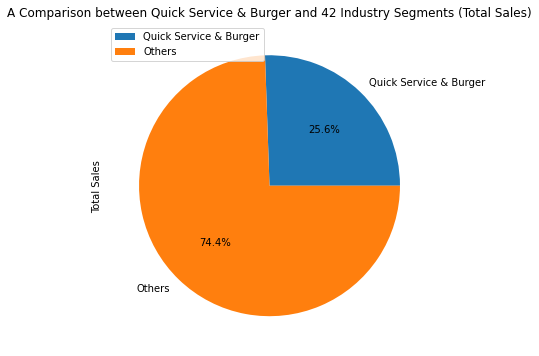

In [155]:
viz_sumPieAnalysis = viz_sumAnalysis.head(1)
viz_sumPieAnalysis = viz_sumPieAnalysis.append({'Segment_Category':"Others", 'Total Units': sum(viz_sumAnalysis['Total Units'][1:]), 'Total Sales':sum(viz_sumAnalysis['Total Sales'][1:])}, ignore_index=True) 

cx = viz_sumPieAnalysis.plot(figsize=(9,6),kind='pie', y='Total Sales',autopct='%1.1f%%', labels=viz_sumPieAnalysis['Segment_Category'])
cx.set_title('A Comparison between Quick Service & Burger and 42 Industry Segments (Total Sales)')


Text(0.5, 1.0, 'A Comparison between Quick Service & Burger and 42 Industry Segments (Total Units)')

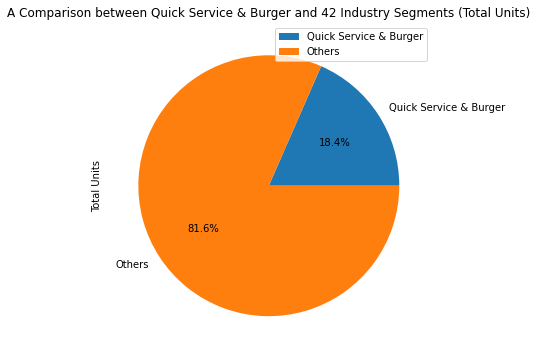

In [154]:
dx = viz_sumPieAnalysis.plot(figsize=(9,6),kind='pie', y='Total Units',autopct='%1.1f%%', labels=viz_sumPieAnalysis['Segment_Category'])
dx.set_title('A Comparison between Quick Service & Burger and 42 Industry Segments (Total Units)')


### Analysis

It can be seen that 1/4 or **(25.6%)** of the Total Sales of the Top 250 restaurants come from a **Quick Service & Burger** type of Industry Segment. Likewise, roughly 1/5 or **(18.4%)** of the total units come from a **Quick Service & Burger** type of Industry as well.

Text(0.5, 1.0, 'Correlation between the Total Sales and Units (w/ the Top 10 Units removed)')

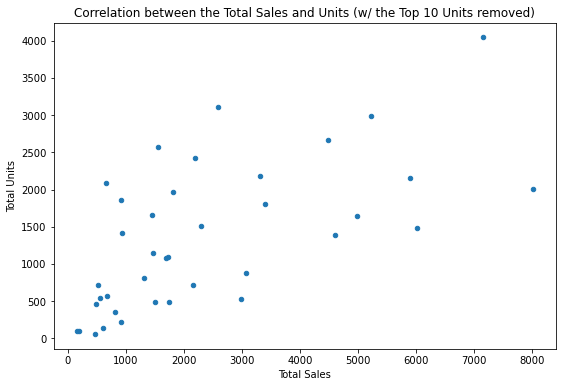

In [169]:
sum_correlation = viz_sumAnalysis[10:].plot(kind="scatter", x='Total Sales', y='Total Units', figsize=(9,6))

sum_correlation.set_title('Correlation between the Total Sales and Units (w/ the Top 10 Units removed)')

### Analysis

As what was proven in the analysis, there is a highly positive correlation between the total sales and the total units. In this visualization, the top 10 Restaruant with the highest total units were removed because of these being extreme outliers. 

### Visualizing the Year on Year Increase in Sales and Units

We now move to visualizing the data analyzed from the YOY Sales and Units.

Text(0, 0.5, 'Industry Segment')

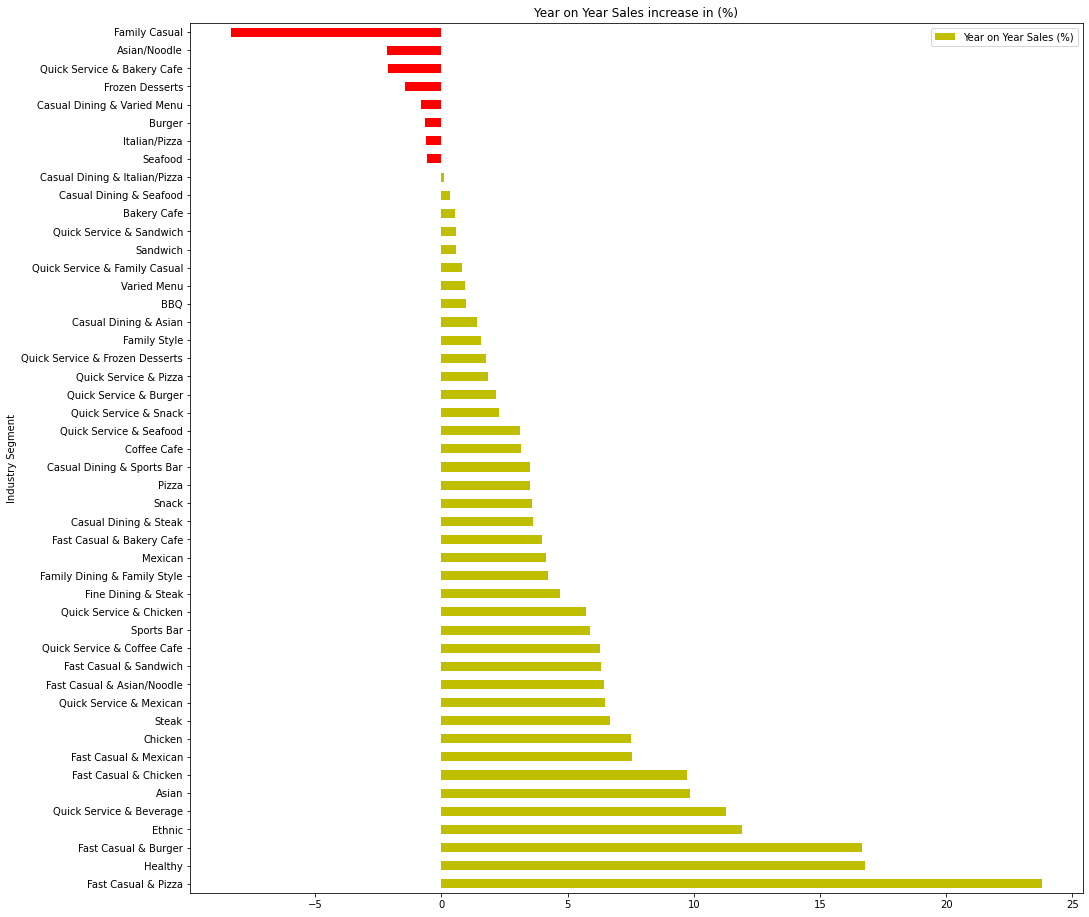

In [203]:
viz_aveAnalysis = sc_aveAnalysis.reset_index()

viz_aveAnalysisSales = viz_aveAnalysis.sort_values(by=['Year on Year Sales (%)'], ascending= False)
viz_aveAnalysisSales['positive'] = viz_aveAnalysisSales['Year on Year Sales (%)'] > 0

ex = viz_aveAnalysisSales.plot.barh(figsize=(16,16), x='Segment_Category', y='Year on Year Sales (%)', color=viz_aveAnalysisSales.positive.map({True: 'y', False: 'r'}))
ex.set_title("Year on Year Sales increase in (%)")
ex.set_ylabel('Industry Segment')

### Analysis

Based on the figure above, we could see that there is an increasing sales trend with regards to **Fast Casual** type of industry segment. Additionally, there is a huge decrease of YOY sales in a **Family Casual** type of industry segment.

Text(0, 0.5, 'Industry Segment')

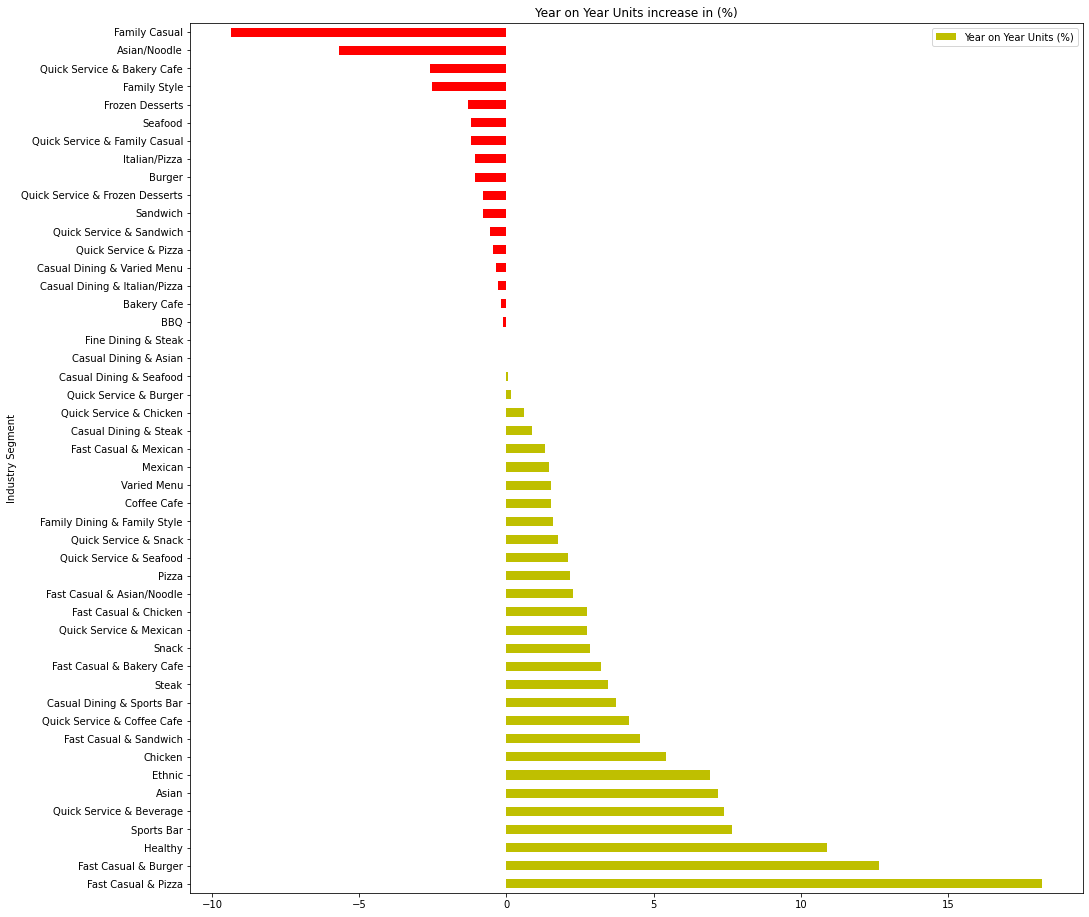

In [202]:
viz_aveAnalysisUnits = viz_aveAnalysis.sort_values(by=['Year on Year Units (%)'], ascending= False)
viz_aveAnalysisUnits['positive'] = viz_aveAnalysisUnits['Year on Year Units (%)'] > 0
fx = viz_aveAnalysisUnits.plot.barh(figsize=(16,16), x='Segment_Category', y='Year on Year Units (%)', color=viz_aveAnalysisUnits.positive.map({True: 'y', False: 'r'}))
fx.set_title("Year on Year Units increase in (%)")
fx.set_ylabel('Industry Segment')

### Analysis

A similar trend can be seen in the YOY Units increase with **Fast Casual** types of Industry Segment most having an increase while **Family Casuals** having a huge decline.

Text(0.5, 1.0, 'Correlation between the Average Year on Year Sales and Units')

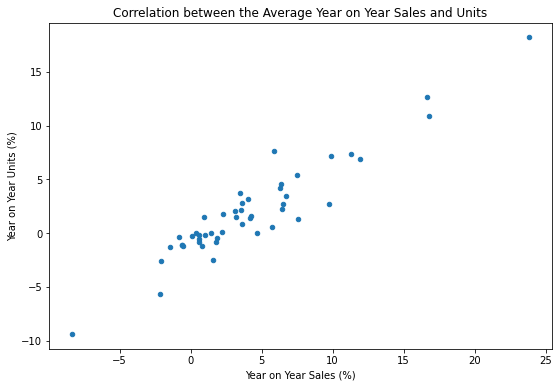

In [175]:
ave_correlation = viz_aveAnalysis.plot(kind="scatter", x='Year on Year Sales (%)', y='Year on Year Units (%)', figsize=(9,6))
ave_correlation.set_title('Correlation between the Average Year on Year Sales and Units')

### Analysis

There is even a stronger positive relationship between the Year on Year Sales and Year on Year Units as what is seen in this scatterplot graph. 

## Summary

To conclude, we found that there is a trend in certain types of industry segment upon evaluating the top 250 Restaurants in 2020. **Fast Casuals and Quick Service** have increasing positive trends with regards to their overall YOY Sales/ Units and Total Sales/ Units respectively. In addition, there are some types of industry segment that are struggling such as **Family Casuals**.